In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from Project_Final_Scripts.tf_idf import tf_idf, save_json
import time
import json

In [89]:
tweet_data = "..\\tweets_sentiment.csv"

pd.set_option('display.max_rows', 255)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [90]:
tweets = pd.read_csv(tweet_data).groupby(['year', 'month', 'day'])['sentiment'].mean().reset_index()
tweets.head()

,year,month,day,sentiment
0,2020,2,1,0.100376
1,2020,2,2,0.083802
2,2020,2,3,0.084910
3,2020,2,4,0.057694
4,2020,2,5,0.074575


In [91]:
x = tweets.month.map(str) + '_' + tweets.day.map(str)
y = tweets.sentiment

zero = [0 for _ in range(len(x))]

max_value = tweets.sentiment.max()
maximum = [max_value for _ in range(len(x))]

min_value = tweets.sentiment.min()
minimum = [min_value for _ in range(len(x))]

std_value = tweets.sentiment.std()
pos_std = [std_value for _ in range(len(x))]
neg_std = [-std_value for _ in range(len(x))]

print('max:', max_value)
print('min:', min_value)
print('std:', std_value)

max: 0.38655622287454156
min: -0.00572478147526307
std: 0.03398012014324434


In [92]:
tweet_hotspots_data = []
tweet_hotspots = []

for index, row in tweets.iterrows():
    # negative hotspots
    if row.sentiment <= std_value:
        tweet_hotspots_data.append({
            'date': f'{int(row.month)}/{int(row.day)}/{int(row.year)}',
            'ratio': row.sentiment
        })
        tweet_hotspots.append(row.sentiment)
    else:
        tweet_hotspots.append(0)

print(len(tweet_hotspots_data), 'negative hotspots')
print(len(tweet_hotspots), 'spots')

33 negative hotspots
218 spots


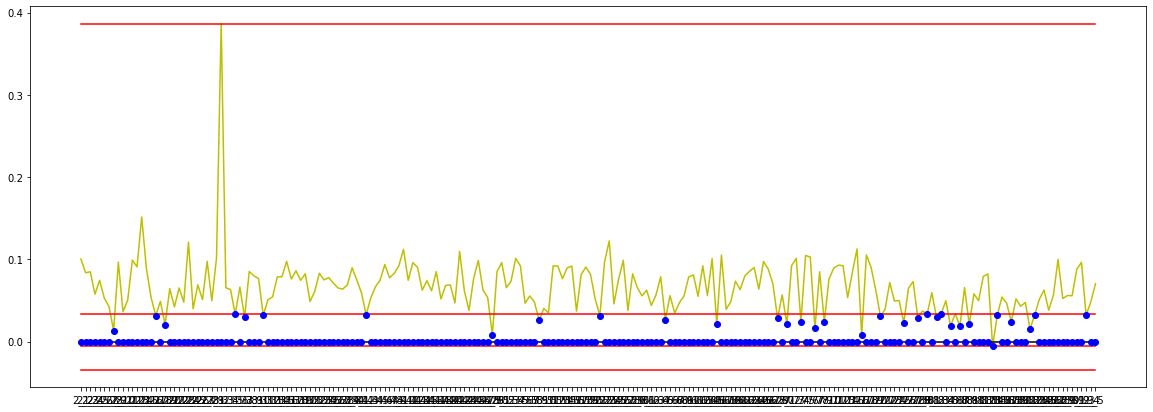

In [93]:
plt.figure(figsize=(20, 7))
plt.plot(
    x, y, 'y',
    x, zero, 'black',
    x, maximum, 'r',
    x, minimum, 'r',
    x, pos_std, 'r',
    x, neg_std, 'r',
    x, tweet_hotspots, 'bo'
)

In [94]:
for tweet_hotspot in tweet_hotspots_data:
    print(tweet_hotspot)
    print('---------------------------------------------------------------------------------------------------------------------------------------------')

{'date': '2/8/2020', 'ratio': 0.013470903060455288}
---------------------------------------------------------------------------------------------------------------------------------------------
{'date': '2/17/2020', 'ratio': 0.03175148494915936}
---------------------------------------------------------------------------------------------------------------------------------------------
{'date': '2/19/2020', 'ratio': 0.020740151515151514}
---------------------------------------------------------------------------------------------------------------------------------------------
{'date': '3/5/2020', 'ratio': 0.0334529327434888}
---------------------------------------------------------------------------------------------------------------------------------------------
{'date': '3/7/2020', 'ratio': 0.029409370611474896}
---------------------------------------------------------------------------------------------------------------------------------------------
{'date': '3/11/2020', 'ratio': 

In [95]:
 for hotspot in tweet_hotspots_data:
    m, d, y = hotspot['date'].split('/')
    m, d, p, n, r = df[(df.month == int(m)) & (df.day == int(d))][['month', 'day', 'prev_cases', 'new_cases', 'diff_avg_ratio']].values[0]
    print({'month': int(m), 'day': int(d), 'prev': int(p), 'new': int(n), 'ratio': r, 'diff': int(abs(p-n))})
    print('---------------------------------------------')

{'month': 2, 'day': 8, 'prev': 0, 'new': 0, 'ratio': -0.11173670901956978, 'diff': 0}
---------------------------------------------
{'month': 2, 'day': 17, 'prev': 0, 'new': 0, 'ratio': -0.11173670901956978, 'diff': 0}
---------------------------------------------
{'month': 2, 'day': 19, 'prev': 0, 'new': 0, 'ratio': -0.11173670901956978, 'diff': 0}
---------------------------------------------
{'month': 3, 'day': 5, 'prev': 2, 'new': 1, 'ratio': -0.010428079447690988, 'diff': 1}
---------------------------------------------
{'month': 3, 'day': 7, 'prev': 6, 'new': 6, 'ratio': -0.11173670901956978, 'diff': 0}
---------------------------------------------
{'month': 3, 'day': 11, 'prev': 16, 'new': 2, 'ratio': 0.5011179636992033, 'diff': 14}
---------------------------------------------
{'month': 4, 'day': 2, 'prev': 16, 'new': 15, 'ratio': -0.09889337320991896, 'diff': 1}
---------------------------------------------
{'month': 4, 'day': 29, 'prev': 7, 'new': 4, 'ratio': -0.0723389086305

# Conclusion
- we can't depend on the `people sentiment` to get `hostspots`